# Simple iteration for systems of linear equations

First, generate a random diagonally dominant matrix, for testing.

In [2]:
import numpy as np
rndm = np.random.RandomState(1234)

n = 10
A = rndm.uniform(size=(n, n)) + np.diagflat([15]*n)
b = rndm.uniform(size=n)

# I.  Jacobi iteration

Given

$$
A x = b
$$

separate the diagonal part $D$,

$$ A = D + (A - D) $$

and write

$$
x = D^{-1} (D - A) x + D^{-1} b\;.
$$

Then iterate

$$
x_{n + 1} = B x_{n} + c\;,
$$

where 

$$
B = D^{-1} (A - D) \qquad \text{and} \qquad c = D^{-1} b
$$


Let's construct the matrix and the r.h.s. for the Jacobi iteration

In [3]:
diag_1d = np.diag(A)

B = -A.copy()
np.fill_diagonal(B, 0)

D = np.diag(diag_1d)
invD = np.diag(1./diag_1d)
BB = invD @ B 
c = invD @ b

In [4]:
# sanity checks
from numpy.testing import assert_allclose

assert_allclose(-B + D, A)


# xx is a "ground truth" solution, compute it using a direct method
xx = np.linalg.solve(A, b)

np.testing.assert_allclose(A@xx, b)
np.testing.assert_allclose(D@xx, B@xx + b)
np.testing.assert_allclose(xx, BB@xx + c)

Check that $\| B\| \leqslant 1$:

In [5]:
np.linalg.norm(BB)

0.36436161983015336

### Do the Jacobi iteration

In [6]:
n_iter = 50

x0 = np.ones(n)
x = x0
for _ in range(n_iter):
    x = BB @ x + c

In [7]:
# Check the result:

A @ x - b

array([ 0.00000000e+00,  2.22044605e-16,  0.00000000e+00, -1.11022302e-16,
        0.00000000e+00,  0.00000000e+00, -2.08166817e-17,  0.00000000e+00,
        0.00000000e+00,  2.22044605e-16])

### Task I.1

Collect the proof-of-concept above into a single function implementing the Jacobi iteration. This function should receive the r.h.s. matrix $A$, the l.h.s. vector `b`, and the number of iterations to perform.


The matrix $A$ in the illustration above is strongly diagonally dominant, by construction. 
What happens if the diagonal matrix elements of $A$ are made smaller? Check the convergence of the Jacobi iteration, and check the value of the norm of $B$.

(20% of the total grade)


In [21]:
#Сдал первую половину с задержкой в день, но сейчас, сдавая вторую половину, случайно загрузил на место первой половины дз 
# и все стерлось, так что присылаю весь (каким то образом восстановленный)файл разом.
def yak(A, b, n_iter = 500):#запишем метод Якоби в функцию
    diag_1d = np.diag(A)
    B = -A.copy()
    np.fill_diagonal(B, 0)
    D = np.diag(diag_1d)
    invD = np.diag(1./diag_1d)
    BB = invD @ B 
    c = invD @ b
    x0 = np.ones(n)
    x = x0
    for _ in range(n_iter):
        x = BB @ x + c
    return A @ x - b, np.linalg.norm(BB)

In [9]:
yak(A, b, n_iter = 500)

(array([ 0.00000000e+00,  2.22044605e-16,  0.00000000e+00, -1.11022302e-16,
         0.00000000e+00,  0.00000000e+00, -2.08166817e-17,  0.00000000e+00,
         0.00000000e+00,  2.22044605e-16]), 0.36436161983015336)

In [10]:
A = rndm.uniform(size=(n, n)) + np.diagflat([1]*n)#уберем доминирующий минор

In [11]:
yak(A, b, n_iter = 500)#норма больше едицы и все расходится

(array([9.55484927e+233, 7.09031975e+233, 7.67741418e+233, 7.32356150e+233,
        1.17466462e+234, 1.26594291e+234, 1.04980466e+234, 8.23554964e+233,
        8.63864411e+233, 1.05440291e+234]), 3.6414476395758366)

# II. Seidel's iteration.

##### Task II.1

Implement the Seidel's iteration. 

Test it on a random matrix. Study the convergence of iterations, relate to the norm of the iteration matrix.

(30% of the total grade)

In [12]:
def seidel(A, b, n_iter = 500):
    x = np.zeros(len(A))
    x_new = np.copy(x)
    for i in range(len(A)):
        for j in range(i):
            s1 = sum(A[i][j] * x_new[j])#считаем сумму левых элементов
        for j in range(i + 1, n):
            s2 = sum(A[i][j] * x[j])#считаем сумму правых элементов
        x_new[i] = (b[i] - s1 - s2) / A[i][i]#выражаем неизвестные диагональные элементы
        x = x_new
    return x

In [13]:
seidel(A, b, n_iter = 500)

TypeError: 'numpy.float64' object is not iterable

# III. Minimum residual scheme

### Task III.1

Implement the $\textit{minimum residual}$ scheme: an explicit non-stationary method, where at each step you select the iteration parameter $\tau_n$ to minimize the residual $\mathbf{r}_{n+1}$ given $\mathbf{r}_n$. Test it on a random matrix, study the convergence to the solution, in terms of the norm of the residual and the deviation from the ground truth solution (which you can obtain using a direct method). Study how the iteration parameter $\tau_n$ changes as iterations progress.

(50% of the grade)

In [17]:
import matplotlib.pyplot as plt
x_n1 = np.ones(len(b))
def minresidual(A, b, x_n1, eps = 1e-3, maxiter = 500): #реализуем курсеровский метод
    x0 = np.linalg.inv(A) @ b
    i = 0
    x_n = np.zeros(len(A))
    tau = 0 
    
    while np.abs(np.linalg.norm(x_n - x_n1)) > eps and i < maxiter:
        tau0 = tau
        i += 1
        j.append(i)
        x_n = x_n1.copy()
        r_n = A @ x_n - b #вычисляем остаток, основываясь на предидущей итерации
        tau = (r_n @ (A @ r_n))/np.linalg.norm(A @ r_n)**2 #вычисляем тау для минимизации r_n1
        x_n1 = x_n - tau * r_n #вычисляем новый икс
        #Сделаем то, что просят в задании:  
        dx.append(np.linalg.norm(x_n1 - x0))#изучим сходимость к решению с точки зрения отклонения от основного истинного решения 
        dr.append(np.linalg.norm(r_n))#изучим сходимость к решению с точки зрения нормы невязки и отклонения от основного истинного решения (которое можно получить, используя прямой метод)
        dtau.append(np.linalg.norm(tau0 - tau))# посмотрим как меняется тау в процессе итераций 
    plt.figure()
    plt.xlabel('Итерация')
    plt.ylabel('Отклонение dx')    
    plt.plot(j, dx) 
    
    plt.figure()
    plt.plot(j, dr) 
    plt.xlabel('Итерация')
    plt.ylabel('Отклонение dr')    
    
    plt.figure()
    plt.xlabel('Итерация')
    plt.ylabel('Изменение tau')
    plt.plot(j, dtau) 
    return x_n1

[ 0.0233118   0.04464471  0.04942     0.03054501  0.04852619  0.03656801
 -0.00901118  0.04390842  0.01373039  0.04851537]


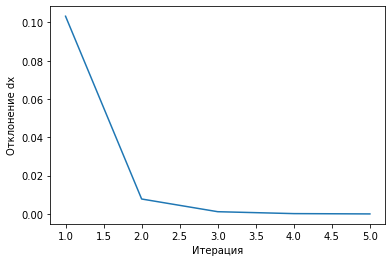

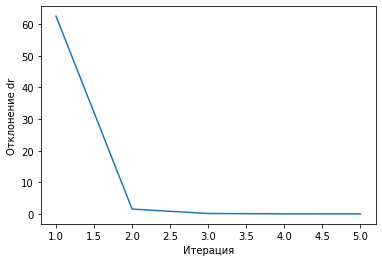

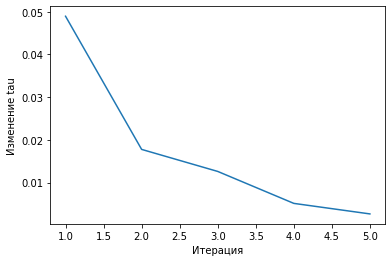

In [18]:
#Вариации с рандомными матрицами из начала домашки
#Тест 1
dx = []
dr = []
dtau = []
j = []
n = 10
A = rndm.uniform(size=(n, n)) + np.diagflat([15]*n)
b = rndm.uniform(size=n)
print(minresidual(A, b, x_n1))

[ 4.50784258e-02  6.72201872e-02  4.85316347e-02  1.71808857e-02
  3.74655981e-05  5.51579028e-02  2.11620463e-02 -1.24824981e-02
  5.86350102e-02  6.33297499e-02]


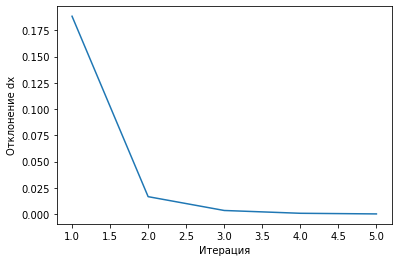

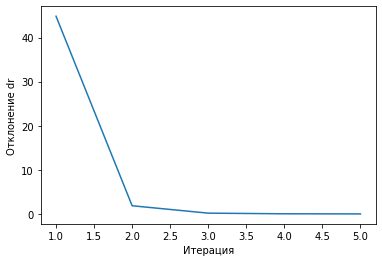

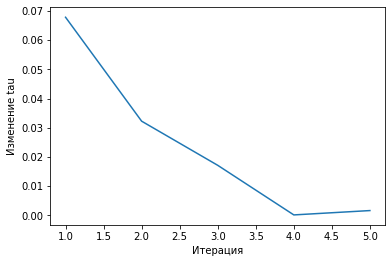

In [19]:
#Тест 2
dx = []
dr = []
dtau = []
j = []
n = 10
A = rndm.uniform(size=(n, n)) + np.diagflat([10]*n)
b = rndm.uniform(size=n)
print(minresidual(A, b, x_n1))

[ 0.27286844 -0.01293004  0.34340427  0.14838938  0.0856957  -0.01988814
  0.11117321 -0.15180819  0.11680522  0.16296742]


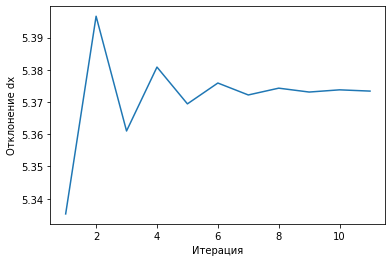

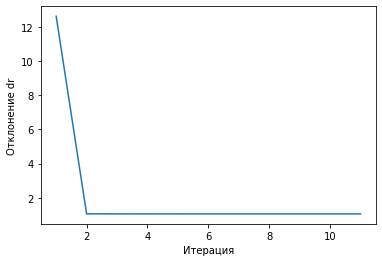

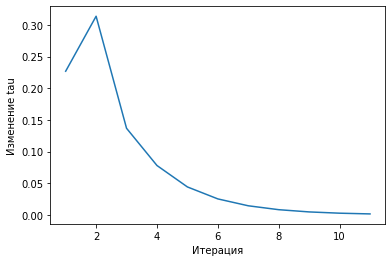

In [20]:
#Тест 3
dx = []
dr = []
dtau = []
j = []
n = 10
A = rndm.uniform(size=(n, n))
b = rndm.uniform(size=n)
print(minresidual(A, b, x_n1))